In [56]:
#importamos librerías necesarias y generamos dataframe a partir de los datos
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import json
import plotly.express as px
from plotly.subplots import make_subplots

#generamos dataframe
gun_weather = pd.read_csv('C:\coderhouse\coderhouse\proyecto_final\gun_violence_full.csv')

In [57]:
gun_weather = gun_weather.dropna(subset='tavg')
gun_weather = gun_weather.dropna(subset='pres')
gun_weather = gun_weather.dropna(subset='prcp')
gun_weather = gun_weather.dropna(subset='wspd')

In [58]:
gun_weather

,incident_id,date,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,tavg,...,participant_suspect_male,participant_suspect_female,participant_suspect_child,participant_suspect_teen,participant_suspect_adult,participant_suspect_injured,participant_suspect_injured_arrested,participant_suspect_unharmed,participant_suspect_unharmed_arrested,participant_suspect_killed
0,92114,2014-01-01,Kentucky,Lexington,0,1,38.0507,-84.4829,NaN,2.0,...,0,0,0,0,0,0,0,0,0,0
2,92119,2014-01-01,Kentucky,Louisville,0,1,38.2501,-85.8150,NaN,2.9,...,0,0,0,0,0,0,0,0,0,0
4,92131,2014-01-01,New York,Bronx,0,1,40.8179,-73.8628,NaN,-1.4,...,0,0,0,0,0,0,0,0,0,0
5,92133,2014-01-01,New York,Brooklyn,0,1,40.6804,-73.9167,NaN,-2.2,...,0,0,0,0,0,0,0,0,0,0
6,92135,2014-01-01,New York,Brooklyn,1,0,40.6838,-73.9075,1.0,-2.2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174224,1079952,2015-09-17,Colorado,Denver,1,1,39.7784,-104.8380,1.0,18.4,...,1,0,0,0,1,0,0,0,0,0
174226,1080161,2017-08-30,Pennsylvania,Allentown,0,0,40.6308,-75.4415,2.0,18.5,...,1,0,0,0,1,0,0,0,1,0
174227,1080480,2017-10-01,Georgia,Athens,0,3,33.9945,-83.3796,1.0,17.1,...,1,0,0,0,1,0,0,0,1,0
174229,1080779,2017-09-22,Florida,Pensacola,0,1,30.4260,-87.2229,1.0,26.1,...,1,0,0,0,1,0,0,0,1,0


In [59]:
gun_weather['tavg'] = gun_weather['tavg'].astype(int)
gun_weather['pres'] = gun_weather['pres'].astype(int)
gun_weather['prcp'] = gun_weather['prcp'].astype(int)
gun_weather['wspd'] = gun_weather['wspd'].astype(int)


In [60]:
gun_weather

,incident_id,date,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,tavg,...,participant_suspect_male,participant_suspect_female,participant_suspect_child,participant_suspect_teen,participant_suspect_adult,participant_suspect_injured,participant_suspect_injured_arrested,participant_suspect_unharmed,participant_suspect_unharmed_arrested,participant_suspect_killed
0,92114,2014-01-01,Kentucky,Lexington,0,1,38.0507,-84.4829,NaN,2,...,0,0,0,0,0,0,0,0,0,0
2,92119,2014-01-01,Kentucky,Louisville,0,1,38.2501,-85.8150,NaN,2,...,0,0,0,0,0,0,0,0,0,0
4,92131,2014-01-01,New York,Bronx,0,1,40.8179,-73.8628,NaN,-1,...,0,0,0,0,0,0,0,0,0,0
5,92133,2014-01-01,New York,Brooklyn,0,1,40.6804,-73.9167,NaN,-2,...,0,0,0,0,0,0,0,0,0,0
6,92135,2014-01-01,New York,Brooklyn,1,0,40.6838,-73.9075,1.0,-2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174224,1079952,2015-09-17,Colorado,Denver,1,1,39.7784,-104.8380,1.0,18,...,1,0,0,0,1,0,0,0,0,0
174226,1080161,2017-08-30,Pennsylvania,Allentown,0,0,40.6308,-75.4415,2.0,18,...,1,0,0,0,1,0,0,0,1,0
174227,1080480,2017-10-01,Georgia,Athens,0,3,33.9945,-83.3796,1.0,17,...,1,0,0,0,1,0,0,0,1,0
174229,1080779,2017-09-22,Florida,Pensacola,0,1,30.4260,-87.2229,1.0,26,...,1,0,0,0,1,0,0,0,1,0


In [61]:
gun_weather_temp = gun_weather.groupby(['tavg']).sum()


In [62]:
print(gun_weather_temp['incident_amount'])

tavg
-39     2
-35     2
-34     1
-33     1
-32     2
       ..
 36    70
 37    38
 38    32
 39     8
 40     4
Name: incident_amount, Length: 75, dtype: int64


<AxesSubplot:xlabel='tavg'>

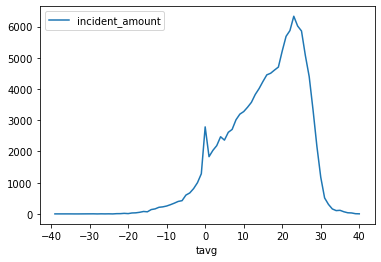

In [63]:
gun_weather_temp.plot(y='incident_amount')

<AxesSubplot:xlabel='tavg'>

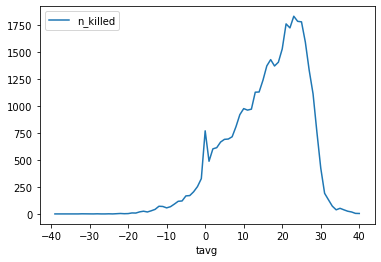

In [64]:
gun_weather_temp.plot(y='n_killed')

<AxesSubplot:xlabel='tavg'>

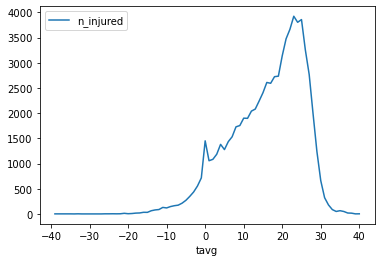

In [65]:
gun_weather_temp.plot(y='n_injured')

In [66]:
gun_weather_pres = gun_weather.groupby(['pres']).sum()

In [67]:
gun_weather_pres.describe()

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved,tavg,tmin,tmax,prcp,...,participant_suspect_male,participant_suspect_female,participant_suspect_child,participant_suspect_teen,participant_suspect_adult,participant_suspect_injured,participant_suspect_injured_arrested,participant_suspect_unharmed,participant_suspect_unharmed_arrested,participant_suspect_killed
count,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,8.928755e+08,500.486486,990.810811,64007.251269,-151495.522343,1088.689189,26491.567568,18317.343243,36523.295946,2923.216216,...,1269.689189,84.054054,4.094595,102.216216,1188.500000,34.972973,20.716216,602.054054,615.810811,64.351351
std,1.428971e+09,811.869755,1617.784411,101660.560162,244422.371142,1713.801981,49458.409976,36786.218413,65641.455866,5140.973790,...,2027.214588,135.841658,7.237969,165.291380,1898.577797,58.718267,32.881906,990.185203,959.348176,103.723742
min,2.268500e+05,0.000000,0.000000,42.983100,-828899.446300,0.000000,-877.000000,-2977.400000,-80.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.318519e+06,2.000000,2.000000,395.072300,-190921.250975,7.000000,-10.250000,-50.525000,10.200000,1.000000,...,7.000000,1.000000,0.000000,0.250000,7.250000,0.000000,0.000000,3.000000,6.000000,0.000000
50%,1.005799e+08,52.000000,91.000000,7143.758000,-15922.756500,152.000000,303.500000,6.550000,1304.150000,236.000000,...,146.000000,6.500000,0.000000,14.000000,129.500000,2.000000,4.000000,61.500000,86.000000,7.500000
75%,1.142992e+09,599.250000,1308.500000,83864.682000,-891.679775,1421.250000,22267.000000,12720.900000,35069.300000,2671.000000,...,1635.500000,109.750000,6.000000,124.500000,1502.000000,49.500000,26.000000,733.250000,835.000000,90.000000
max,4.918037e+09,2803.000000,5531.000000,342704.134000,-71.472300,5880.000000,175578.000000,132223.200000,230864.200000,18780.000000,...,6879.000000,472.000000,28.000000,557.000000,6388.000000,215.000000,119.000000,3444.000000,3191.000000,351.000000


In [68]:
gun_weather.describe()

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved,tavg,tmin,tmax,prcp,...,participant_suspect_male,participant_suspect_female,participant_suspect_child,participant_suspect_teen,participant_suspect_adult,participant_suspect_injured,participant_suspect_injured_arrested,participant_suspect_unharmed,participant_suspect_unharmed_arrested,participant_suspect_killed
count,1.255020e+05,125502.000000,125502.000000,125502.000000,125502.000000,68254.000000,125502.000000,125502.000000,125502.000000,125502.000000,...,125502.000000,125502.000000,125502.000000,125502.000000,125502.000000,125502.000000,125502.000000,125502.000000,125502.000000,125502.000000
mean,5.264680e+05,0.295103,0.584214,37.740726,-89.326614,1.180341,15.620277,10.800492,21.535305,1.723622,...,0.748649,0.049561,0.002414,0.060270,0.700778,0.020621,0.012215,0.354990,0.363102,0.037944
std,2.762374e+05,0.528640,0.742789,5.042072,14.732606,0.952163,9.502429,9.698863,10.171889,6.392737,...,0.866340,0.239915,0.050200,0.319861,0.866341,0.151713,0.116190,0.721154,0.745434,0.194245
min,9.211400e+04,0.000000,0.000000,19.447500,-162.598000,1.000000,-39.000000,-42.000000,-35.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.926598e+05,0.000000,0.000000,34.055900,-93.767200,1.000000,9.000000,3.900000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.106680e+05,0.000000,0.000000,38.880200,-86.353300,1.000000,17.000000,12.200000,23.900000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.736335e+05,1.000000,1.000000,41.521000,-79.748700,1.000000,23.000000,18.500000,29.400000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.083162e+06,9.000000,25.000000,71.292100,-67.271100,20.000000,40.000000,35.000000,49.400000,334.000000,...,20.000000,7.000000,3.000000,10.000000,20.000000,6.000000,3.000000,20.000000,20.000000,3.000000


<AxesSubplot:xlabel='pres'>

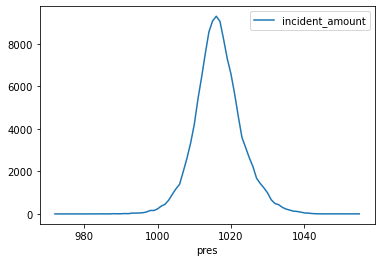

In [69]:
gun_weather_pres.plot(y='incident_amount')

<AxesSubplot:xlabel='pres'>

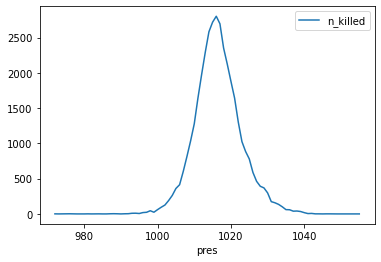

In [70]:
gun_weather_pres.plot(y='n_killed')

<AxesSubplot:xlabel='pres'>

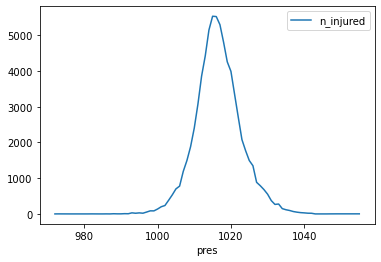

In [71]:
gun_weather_pres.plot(y='n_injured')

In [72]:
gun_weather_prcp = gun_weather.groupby(['prcp']).sum()

In [73]:
gun_weather_prcp.describe()

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved,tavg,tmin,tmax,snow,...,participant_suspect_male,participant_suspect_female,participant_suspect_child,participant_suspect_teen,participant_suspect_adult,participant_suspect_injured,participant_suspect_injured_arrested,participant_suspect_unharmed,participant_suspect_unharmed_arrested,participant_suspect_killed
count,1.140000e+02,114.000000,114.000000,1.140000e+02,1.140000e+02,114.000000,1.140000e+02,1.140000e+02,1.140000e+02,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,5.795859e+08,324.877193,643.157895,4.154857e+04,-9.833920e+04,706.692982,1.719628e+04,1.189021e+04,2.370810e+04,5239.377193,...,824.184211,54.561404,2.657895,66.350877,771.482456,22.701754,13.447368,390.807018,399.736842,41.771930
std,5.075633e+09,2859.420070,5573.221124,3.616433e+05,8.631324e+05,6174.480204,1.489339e+05,1.001308e+05,2.081071e+05,43798.968427,...,7207.865993,479.079963,24.070629,581.137076,6757.681648,198.611638,120.217656,3371.371775,3531.287845,373.612383
min,1.271230e+05,0.000000,0.000000,2.611840e+01,-9.218467e+06,0.000000,-1.300000e+01,-1.830000e+01,-8.900000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.146399e+06,1.000000,1.000000,7.940997e+01,-1.002438e+04,1.000000,5.125000e+01,4.682500e+01,6.190000e+01,0.000000,...,1.250000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,7.236942e+06,5.000000,6.500000,4.142732e+02,-9.936065e+02,9.000000,2.375000e+02,2.029500e+02,2.871000e+02,0.000000,...,8.500000,1.000000,0.000000,0.500000,9.000000,0.000000,0.000000,5.000000,3.500000,0.000000
75%,5.661039e+07,32.000000,70.000000,4.440212e+03,-1.815018e+02,63.500000,2.171750e+03,1.744100e+03,2.746050e+03,187.500000,...,86.000000,5.000000,0.000000,5.000000,75.500000,3.000000,1.000000,43.000000,37.000000,4.000000
max,5.420845e+10,30541.000000,59522.000000,3.862156e+06,-7.167980e+01,65941.000000,1.590832e+06,1.069430e+06,2.222952e+06,466629.000000,...,76976.000000,5116.000000,257.000000,6206.000000,72169.000000,2121.000000,1284.000000,36004.000000,37711.000000,3991.000000


<AxesSubplot:xlabel='prcp'>

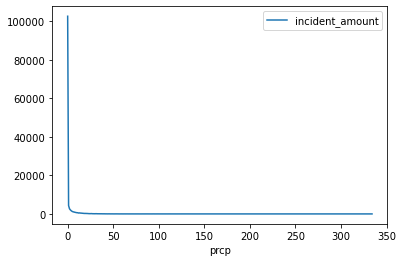

In [74]:

gun_weather_prcp.plot(y='incident_amount')

<AxesSubplot:xlabel='prcp'>

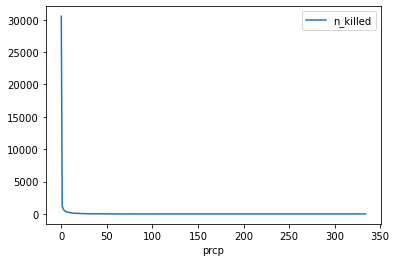

In [75]:
gun_weather_prcp.plot(y='n_killed')

<AxesSubplot:xlabel='prcp'>

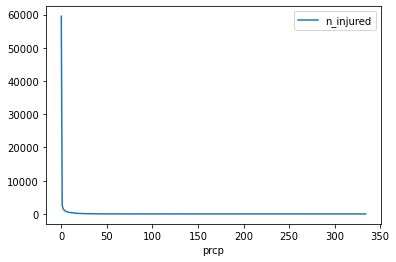

In [76]:
gun_weather_prcp.plot(y='n_injured')

In [77]:
gun_weather_wind = gun_weather.groupby(['wspd']).sum()

In [78]:
gun_weather_wind.describe()

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved,tavg,tmin,tmax,prcp,...,participant_suspect_male,participant_suspect_female,participant_suspect_child,participant_suspect_teen,participant_suspect_adult,participant_suspect_injured,participant_suspect_injured_arrested,participant_suspect_unharmed,participant_suspect_unharmed_arrested,participant_suspect_killed
count,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.321456e+09,740.720000,1466.400000,94730.731878,-224213.373068,1611.260000,39207.520000,27109.668000,54054.478000,4326.360000,...,1879.140000,124.400000,6.060000,151.280000,1758.980000,51.760000,30.660000,891.040000,911.400000,95.240000
std,1.680479e+09,958.695884,1866.570521,119971.935209,286879.735484,2025.590675,53667.109316,38113.998182,73115.877552,5258.390406,...,2400.365806,159.711858,8.546177,194.888879,2261.953747,67.709632,38.793861,1137.729765,1162.739411,123.687156
min,2.724000e+05,0.000000,0.000000,30.047000,-905816.912000,0.000000,-2.000000,-39.600000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.504330e+07,10.500000,25.500000,1962.679675,-420691.217775,30.000000,436.000000,213.225000,650.050000,159.250000,...,36.250000,2.250000,0.000000,2.250000,32.750000,0.000000,0.250000,16.000000,20.000000,1.000000
50%,4.134435e+08,216.000000,456.500000,30877.752500,-69339.715850,528.500000,8303.500000,4632.150000,12226.150000,1453.500000,...,607.500000,36.500000,1.500000,41.000000,555.000000,14.500000,12.500000,281.500000,280.500000,29.500000
75%,2.459064e+09,1373.000000,2622.000000,174348.583100,-4463.702325,3014.750000,68824.250000,46451.525000,94465.050000,7238.750000,...,3516.000000,215.250000,11.500000,267.250000,3352.000000,101.500000,53.750000,1654.000000,1742.000000,163.750000
max,5.275521e+09,3029.000000,5916.000000,374740.638700,-89.988700,6374.000000,172761.000000,123509.000000,234554.200000,15932.000000,...,7643.000000,483.000000,30.000000,622.000000,7206.000000,210.000000,143.000000,3665.000000,3649.000000,397.000000


<AxesSubplot:xlabel='wspd'>

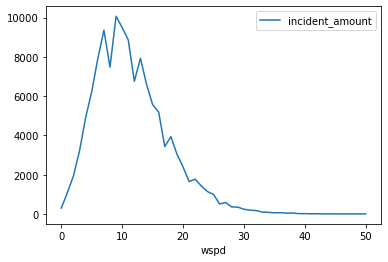

In [79]:
gun_weather_wind.plot(y='incident_amount')

<AxesSubplot:xlabel='wspd'>

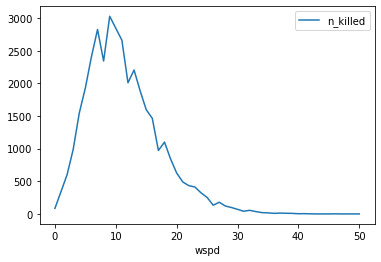

In [80]:
gun_weather_wind.plot(y='n_killed')

<AxesSubplot:xlabel='wspd'>

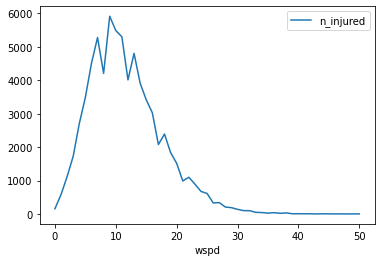

In [81]:
gun_weather_wind.plot(y='n_injured')